<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Arinal !

Perkenalkan saya Dipta, disini saya akan mereview tugas Arinal ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Arinal dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Menganalisis Risiko Gagal Bayar Peminjam

Tugas Anda adalah menyiapkan laporan untuk divisi kredit suatu bank. Anda akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan Anda akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

[Dalam *notebook* ini, Anda dapat menemukan petunjuk dan instruksi singkat serta arahan untuk berfikir. Jangan abaikan petunjuk tersebut karena mereka dirancang untuk membekali Anda dengan struktur pengerjaan proyek dan akan membantu Anda menganalisis apa yang sedang Anda lakukan secara mendalam. Sebaliknya, buatlah agar laporan ini terlihat seolah-olah dikirimkan oleh Anda kepada rekan satu tim Anda untuk menunjukkan temuan Anda - mereka tidak perlu tahu bahwa Anda mendapatkan bantuan eksternal dari kami! Untuk membantu Anda, kami menempatkan semua petunjuk yang harus Anda hapus dalam tanda kurung siku.]

[Sebelum Anda masuk ke dalam analisis data Anda, jelaskan tujuan proyek dan hipotesis yang akan Anda uji.]

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, sudah dijelaskan terkait deskripsi dari project

</div>

## Buka *file* data dan baca informasi umumnya.

[Mulailah dengan mengimpor *library* dan memuat datanya. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [32]:
# Muat semua *library*
import pandas as pd
data_kreditur = pd.read_csv('/datasets/credit_scoring_eng.csv')

# Muat datanya
data_kreditur

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Soal 1. Eksplorasi data

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

[Sekarang saatnya mengeksplor data kita. Anda perlu melihat berapa banyak kolom dan baris yang dimiliki oleh data, serta mencermati beberapa baris data untuk memeriksa potensi masalah dengan data.]

In [33]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
data_kreditur.shape

(21525, 12)

In [34]:
# Mari tampilkan N baris pertama
data_kreditur.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


[Jelaskan apa yang Anda lihat dan perhatikan dalam sampel data yang Anda tampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?]

days_employed disitu hasilnya negatif, yang seharusnya hasilnya bukan negatif

In [35]:
# Dapatkan informasi data
data_kreditur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


[Apakah terdapat nilai yang hilang di semua kolom atau hanya di beberapa kolom? Jelaskan secara singkat apa yang Anda amati dalam 1-2 kalimat.]

Nilai yang hilang berada di kolom days_employed dan total_income. Anehnya dari 2 kolom tersebut memliki nilai yang sama persis.

In [36]:
# Mari kita lihat tabel yang difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
data_kreditur[data_kreditur['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


[Apakah nilai yang hilang tampak simetris? Apakah kita yakin dengan asumsi ini? Jelaskan pendapat Anda secara singkat di bagian ini. Anda mungkin ingin melakukan penyelidikan lebih lanjut, dan menghitung nilai yang hilang di semua baris dengan nilai yang hilang untuk memastikan bahwa sampel yang hilang memiliki ukuran yang sama.] 

Dari data di atas tampak nilai yang hilang sama persis untuk kolom days_employed dan total_income

In [37]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.
data_kreditur.isna().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [38]:
data_kreditur[data_kreditur['days_employed'].isna() & data_kreditur['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Kesimpulan sementara**

[Apakah jumlah baris dalam tabel yang telah difilter sesuai dengan jumlah nilai yang hilang? Kesimpulan apa yang bisa kita buat dari hal ini?] Jumlahnya sesuai dengan nilai yang hilang. Kesimpulannya data yang hilang mungkin saja memiliki pola tertentu

[Hitung persentase nilai yang hilang jika dibandingkan dengan keseluruhan *dataset*. Apakah nilai yang hilang merupakan bagian data yang cukup besar? Jika demikian, Anda sebaiknya perlu mengisi nilai yang hilang. Untuk melakukannya, pertama-tama kita harus mempertimbangkan apakah data yang hilang bisa jadi disebabkan oleh karakteristik nasabah tertentu, seperti jenis pekerjaan atau yang lainnya. Anda harus memutuskan karakteristik mana yang menurut *Anda* mungkin merupakan penyebabnya. Kedua, kita harus memeriksa apakah ada ketergantungan nilai yang hilang pada nilai indikator lain dengan kolom-kolom yang mengidentifikasikan karakteristik tertentu nasabah.]

[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini.]

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [39]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
data_filter = data_kreditur[data_kreditur['days_employed'].isna() & data_kreditur['total_income'].isna()]
data_filter.reset_index(drop=True)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
2169,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
2170,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
2171,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
2172,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


In [40]:
# Periksalah distribusinya
data_filter['gender'].value_counts(normalize=True)


F    0.682613
M    0.317387
Name: gender, dtype: float64

In [41]:
data_filter['income_type'].value_counts(normalize=True)

employee         0.508280
business         0.233671
retiree          0.189972
civil servant    0.067617
entrepreneur     0.000460
Name: income_type, dtype: float64

In [42]:
data_filter['dob_years'].value_counts(normalize=True)

34    0.031739
40    0.030359
31    0.029899
42    0.029899
35    0.029439
36    0.028979
47    0.027139
41    0.027139
30    0.026679
28    0.026219
57    0.025759
58    0.025759
54    0.025299
38    0.024839
56    0.024839
37    0.024379
52    0.024379
39    0.023459
33    0.023459
50    0.023459
51    0.022999
45    0.022999
49    0.022999
29    0.022999
43    0.022999
46    0.022079
55    0.022079
48    0.021159
53    0.020239
44    0.020239
60    0.017939
61    0.017479
62    0.017479
64    0.017019
32    0.017019
27    0.016559
23    0.016559
26    0.016099
59    0.015639
63    0.013339
25    0.010580
24    0.009660
66    0.009200
65    0.009200
21    0.008280
22    0.007820
67    0.007360
0     0.004600
68    0.004140
69    0.002300
20    0.002300
71    0.002300
70    0.001380
72    0.000920
19    0.000460
73    0.000460
Name: dob_years, dtype: float64

[Deksripsikan temuan Anda di sini.] Dari temuan diatas, bahwa nilai yang hilang di dominasi oleh female sebanyak 68%. Dan tipe penghasilannya yg paling banyak adalah employee sebanyak 50%

**Kemungkinan penyebab hilangnya nilai dalam data**

[Kemukakan gagasan Anda mengenai kemungkinan alasan hilangnya nilai-nilai tersebut. Apakah menurut Anda mereka hilang secara acak atau apakah terdapat pola-pola tertentu?] Karena data yang hilang ada di kolom days_employed dan total_income. Menurut saya itu memang berhubungan karena days_employed tidak di ketahui, bisa saja memang orang tersebut tidak bekerja jadi tidak ada income yang masuk perbulannya.

[Mari kita mulai memeriksa apakah nilai yang hilang bersifat acak.]

In [43]:
# Memeriksa distribusi di seluruh *dataset*
data_kreditur['gender'].value_counts(normalize=True)

F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

**Kesimpulan sementara**

[Apakah distribusi dalam *dataset* yang asli mirip dengan distribusi tabel yang telah difilter? Apa artinya hal tersebut untuk kita?] Untuk distribusi di kolom gender data yang di filter dan tidak jumlahnya mendapat angka yang mirip2

[Jika menurut Anda kita belum dapat membuat kesimpulan apa pun, mari kita kembali menyelidiki *dataset* lebih lanjut. Mari pikirkan alasan lain yang dapat menyebabkan data hilang dan periksa apakah kita dapat menemukan pola tertentu yang dapat membuat kita berpikir bahwa hilangnya nilai-nilai tersebut tidak terjadi secara acak. Karena ini merupakan tugas Anda, maka bagian ini adalah opsional.]

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

In [44]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
data_kreditur['income_type'].value_counts(normalize=True)

employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

**Kesimpulan sementara**

[Apakah pada akhirnya kita dapat memastikan bahwa nilai yang hilang adalah suatu kebetulan? Periksa hal lain yang menurut Anda penting di sini.] Dari income_type nya juga sama tidak jauh berbeda

In [45]:
# Periksa pola lainnya - jelaskan pola tersebut
data_kreditur['debt'].value_counts(normalize=True)

0    0.919117
1    0.080883
Name: debt, dtype: float64

**Kesimpulan**

[Apakah Anda menemukan suatu pola? Bagaimana Anda mendapatkan kesimpulan ini?] Sepertinya data yang hilang tidak memiliki pola alias acak

[Jelaskan bagaimana Anda akan mengatasi nilai-nilai yang hilang. Pertimbangkan kategori dengan nilai yang hilang.] Mengisi nilai yang hilang dengan rata-rata mungkin keputusan yang tepat

[Rencanakan secara singkat langkah Anda selanjutnya untuk mentransformasi data. Anda mungkin perlu mengatasi berbagai jenis masalah: duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.] Saya akan coba liat rata-rata lama bekerja nya dan umur nya yang menjadi patokan untuk mengisi nilai yang hilang

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Transformasi data

[Mari kita perhatikan setiap kolom untuk melihat masalah apa yang mungkin dimiliki mereka.]

[Mulailah dengan menghapus duplikat dan memperbaiki data tentang informasi pendidikan jika diperlukan.]

In [46]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
data_kreditur['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [47]:
# Perbaiki pencatatan jika diperlukan
data_kreditur['education'] = data_kreditur['education'].str.lower()

In [48]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
data_kreditur['education'].value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Periksa data kolom `children`]

In [49]:
# Mari kita lihat distribusi nilai pada kolom `children`
data_kreditur['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

[Apakah terdapat hal-hal yang aneh di kolom tersebut? Bagaimana mereka bisa terjadi? Buat keputusan tentang apa yang akan Anda lakukan dengan data ini dan jelaskan alasannya.] Ada 2 data yang aneh anaknya ada yang berjumlah 20 dan -1. Saya akan rubah ke 2 dan 1 mungkin user typo ketika melakukan input.

In [50]:
# [perbaiki data berdasarkan keputusan Anda]
data_kreditur['children'] = data_kreditur['children'].replace(-1,1)
data_kreditur['children'] = data_kreditur['children'].replace(20,2)

In [51]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
data_kreditur['children'].unique()

array([1, 0, 3, 2, 4, 5])

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Periksa data dalam kolom the `days_employed`. Pertama-tama pikirkan tentang masalah apa yang mungkin ada pada kolom tersebut, serta pikirkan juga apa yang mungkin ingin Anda periksa dan bagaimana Anda akan melakukannya.]

In [52]:
# Temukan data yang bermasalah di `days_employed`, jika memang terdapat masalah, dan hitung persentasenya
data_filter = data_kreditur[data_kreditur['days_employed']<=0]
data_filter['days_employed'].reset_index(drop=True)

0       -8437.673028
1       -4024.803754
2       -5623.422610
3       -4124.747207
4        -926.185831
            ...     
15901   -2351.431934
15902   -4529.316663
15903   -2113.346888
15904   -3112.481705
15905   -1984.507589
Name: days_employed, Length: 15906, dtype: float64

In [53]:
presentase = data_filter['days_employed'].count() / data_kreditur['days_employed'].count()
print("Data yang bermasalah di kolom 'days_employed':{:.0%} dari keseluruhan data.".format(presentase))

Data yang bermasalah di kolom 'days_employed':82% dari keseluruhan data.


[Jika jumlah data yang bermasalah tinggi, hal tersebut mungkin disebabkan oleh beberapa masalah teknis. Kami mungkin perlu mengusulkan alasan paling jelas mengapa hal tersebut dapat terjadi dan bagaimana seharusnya data yang benar, mengingat kita tidak dapat menghapus baris yang bermasalah ini.]

In [54]:
# Atasi nilai yang bermasalah, jika ada
data_kreditur['days_employed'] = data_kreditur['days_employed'].abs()

In [55]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
data_kreditur

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [56]:
data_new = data_kreditur
data_new['years_employed'] = data_new['days_employed'] / 365
data_new

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Sekarang mari kita lihat usia nasabah dan mengecek apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang kemungkinan kejanggalan apa yang bisa kita temui dalam kolom ini, misalnya angka usia yang tidak masuk akal.]

In [57]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
data_new['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

[Putuskan apa yang akan Anda lakukan dengan nilai yang bermasalah dan jelaskan alasannya.] Di dalam data ada nilai umur 0 dimana itu suatu hal yang tidak mungkin. Langsung saya hapus aja untuk umur yang 0

In [58]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
data_new = data_new[data_new['dob_years'] != 0].reset_index(drop=True)

In [59]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
data_new

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21419,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21420,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258
21421,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991
21422,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Sekarang saatnya memeriksa kolom `family_status`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi.]

In [60]:
# Mari kita lihat nilai untuk kolom ini
data_new['family_status'].value_counts()

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

# Atasi nilai yang bermasalah di `family_status`, jika ada
Menurut saya tidak ada yang perlu di perbaiki di kolom ini

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Sekarang saatnya memeriksa kolom `gender`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [61]:
# Mari kita liat nilai dalam kolom ini
data_new['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

In [62]:
# Atasi nilai-nilai yang bermasalah, jika ada
#Menurut saya ini juga tidak ada masalah yaa terkait di luar negeri ada yang gendernya begitu

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Sekarang saatnya memeriksa kolom `income_type`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [63]:
# Mari kita lihat nilai dalam kolom ini
data_new['income_type'].value_counts()

employee                       11064
business                        5065
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [64]:
# Atasi nilai yang bermasalah, jika ada
#Tidak ada semua terlihat baik-baik saja

[Sekarang saatnya melihat apakah ada duplikat di dalam data kita. Jika kita menemukannya, Anda harus memutuskan apa yang akan Anda lakukan dengan duplikat tersebut dan menjelaskan alasannya.]

In [65]:
# Periksa duplikat
data_new.duplicated().sum()

71

In [66]:
# Atasi duplikat, jika ada
data_new = data_new.drop_duplicates().reset_index(drop=True)

In [67]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
data_new

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087
21349,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258
21350,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991
21351,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347


In [68]:
# Periksa ukuran dataset yang sekarang Anda miliki setelah manipulasi pertama yang Anda lakukan
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21353 non-null  int64  
 1   days_employed     19260 non-null  float64
 2   dob_years         21353 non-null  int64  
 3   education         21353 non-null  object 
 4   education_id      21353 non-null  int64  
 5   family_status     21353 non-null  object 
 6   family_status_id  21353 non-null  int64  
 7   gender            21353 non-null  object 
 8   income_type       21353 non-null  object 
 9   debt              21353 non-null  int64  
 10  total_income      19260 non-null  float64
 11  purpose           21353 non-null  object 
 12  years_employed    19260 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


[Jelaskan *dataset* baru Anda: jelaskan secara singkat apa saja perubahannya dan seberapa besar persentase perubahannya, jika ada.]


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Bekerja dengan nilai yang hilang

[Untuk mempercepat pekerjaan dengan sejumlah data, Anda mungkin ingin menggunakan *dictionary* untuk beberapa nilai yang memiliki ID. Jelaskan mengapa dan *dictionary* apakah yang akan Anda gunakan.]

In [69]:
# Temukan dictionary
data_new[ ['education', 'education_id'] ].drop_duplicates().reset_index(drop=True)

,education,education_id
0,bachelor's degree,0
1,secondary education,1
2,some college,2
3,primary education,3
4,graduate degree,4


In [72]:
data_new[ ['family_status', 'family_status_id'] ].drop_duplicates().reset_index(drop=True)

,family_status,family_status_id
0,married,0
1,civil partnership,1
2,widow / widower,2
3,divorced,3
4,unmarried,4


<div class="alert alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

- dictionary belum di buat
- buat dictionary antara education dan education id, serta family status dan family status id

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

### Memperbaiki nilai yang hilang di `total_income`

[Jelaskan secara singkat kolom dengan nilai yang hilang manakah yang perlu Anda tangani. Jelaskan bagaimana Anda akan memperbaikinya.]


[Mulailah dengan mengatasi total nilai pendapatan yang hilang. Buatlah kategori usia untuk nasabah. Buatlah kolom baru yang memuat kategori usia. Strategi ini dapat membantu untuk menghitung total nilai pendapatan.]


In [38]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia
def age_group(age):
    try:
        if age <= 17:
            return 'Child'
        elif 18 <= age <= 30:
            return 'Young Adult'
        elif 31 <= age <= 50:
            return 'Middle-age Adult'
        else:
            return 'Old'
    except:
        return 'Unidentified'

In [39]:
# Lakukan pengujian untuk melihat apakah fungsi Anda bekerja atau tidak
data_new['dob_years'].apply(age_group).value_counts()

Middle-age Adult    10992
Old                  6644
Young Adult          3717
Name: dob_years, dtype: int64

In [40]:
# Buatlah kolom baru berdasarkan fungsi
data_new['age_category'] = data_new['dob_years'].apply(age_group)

In [41]:
# Periksa bagaimana nilai di dalam kolom baru
data_new

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-age Adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-age Adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-age Adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-age Adult
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21348,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Middle-age Adult
21349,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,Old
21350,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Middle-age Adult
21351,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Middle-age Adult


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Pikirkan tentang faktor-faktor yang biasanya bergantung pada pendapatan. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Untuk membuat keputusan ini, Anda mungkin ingin melihat distribusi faktor-faktor yang Anda identifikasi sebagai dampak dari pendapatan seseorang.]

[Buatlah tabel yang hanya memuat data tanpa nilai yang hilang. Data ini akan digunakan untuk memperbaiki nilai yang hilang.]

In [42]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
data_notna = data_new[data_new['days_employed'].notna()].reset_index(drop=True)

In [43]:
data_notna

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-age Adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-age Adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-age Adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-age Adult
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Middle-age Adult
19256,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,Old
19257,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Middle-age Adult
19258,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Middle-age Adult


In [44]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
data_notna.groupby('age_category')['total_income'].mean()

age_category
Middle-age Adult    28383.188755
Old                 24704.150073
Young Adult         25817.674826
Name: total_income, dtype: float64

In [45]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah Anda identifikasi
data_notna.groupby('age_category')['total_income'].median()

age_category
Middle-age Adult    24711.8435
Old                 21310.9445
Young Adult         22957.1850
Name: total_income, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_income'>

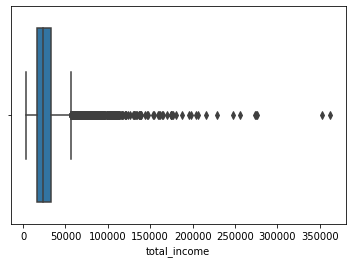

In [46]:
import seaborn as sns
sns.boxplot(data_notna['total_income'])

[Ulangi perbandingan tersebut untuk beberapa faktor. Pastikan Anda mempertimbangkan berbagai aspek dan menjelaskan proses berpikir Anda.]



[Buatlah keputusan tentang karakteristik yang paling menentukan pendapatan dan apakah Anda akan menggunakan median atau rata-rata. Jelaskan mengapa Anda membuat keputusan ini] Karena outlier cukup banyak saya lebih memilih memakai median saja


In [47]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [48]:
# Memeriksa bagaimana nilai di dalam kolom baru
data_new.isna().sum()

children               0
days_employed       2093
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2093
purpose                0
years_employed      2093
age_category           0
dtype: int64

In [49]:
# Terapkan fungsi tersebut ke setiap baris
data_new1 = fill_missing_value(data_new, 'age_category', 'total_income')

In [50]:
# Periksa apakah kita mendapatkan kesalahan
data_new1.isna().sum()

children               0
days_employed       2093
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed      2093
age_category           0
dtype: int64

[Jika Anda menemukan kesalahan dalam menyiapkan nilai untuk data yang hilang, mungkin berarti ada sesuatu yang istimewa tentang data untuk kategori tersebut. Mari pikirkan - Anda mungkin ingin memperbaiki beberapa hal secara manual, jika terdapat cukup data untuk menemukan median/rata-rata.]


In [52]:
# Ganti nilai yang hilang jika terdapat kesalahan
#Semua berjalan dengan normal

[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [53]:
# Periksa jumlah entri di kolom
data_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21353 non-null  int64  
 1   days_employed     19260 non-null  float64
 2   dob_years         21353 non-null  int64  
 3   education         21353 non-null  object 
 4   education_id      21353 non-null  int64  
 5   family_status     21353 non-null  object 
 6   family_status_id  21353 non-null  int64  
 7   gender            21353 non-null  object 
 8   income_type       21353 non-null  object 
 9   debt              21353 non-null  int64  
 10  total_income      21353 non-null  float64
 11  purpose           21353 non-null  object 
 12  years_employed    19260 non-null  float64
 13  age_category      21353 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

###  Memperbaiki nilai di `days_employed`

[Pikirkan tentang parameter yang dapat membantu Anda memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Anda mungkin perlu melakukan penelitian yang sama dengan yang Anda lakukan saat memperbaiki data di kolom sebelumnya.]

In [54]:
# Distribusi median dari `days_employed` berdasarkan parameter yang Anda identifikasi
data_new1.groupby('income_type')['days_employed'].median()

income_type
business                         1548.637544
civil servant                    2673.404956
employee                         1576.067689
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365176.336775
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

In [55]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang Anda identifikasi
data_new1.groupby('income_type')['days_employed'].mean()

income_type
business                         2112.798330
civil servant                    3388.508552
employee                         2328.603723
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365015.727554
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='days_employed'>

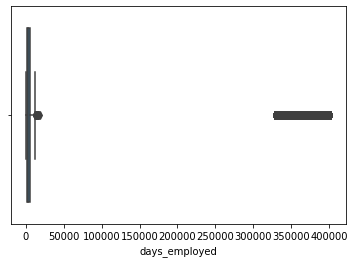

In [56]:
sns.boxplot(data_notna['days_employed'])

[Tentukan apa yang akan Anda gunakan: rata-rata atau median. Jelaskan mengapa.] Saya menggunakan median karena terdapat outlier yang beda nya sangat signifikan

In [57]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusan Anda) berdasarkan parameter yang Anda identifikasi
def fill_missing_value(dataframe, agg_column, value_column):
    grouped_values = dataframe.groupby(agg_column)[value_column].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values[agg_column][i]
        value = grouped_values[value_column][i]
        dataframe.loc[(dataframe[agg_column]==group) & (dataframe[value_column].isna()), value_column] = value
    return dataframe

In [58]:
# Terapkan fungsi ke income_type
data_new2 = fill_missing_value(data_new1, 'income_type', 'days_employed')

In [59]:
# Periksa apakah fungsi Anda bekerja
data_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21353 entries, 0 to 21352
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21353 non-null  int64  
 1   days_employed     21353 non-null  float64
 2   dob_years         21353 non-null  int64  
 3   education         21353 non-null  object 
 4   education_id      21353 non-null  int64  
 5   family_status     21353 non-null  object 
 6   family_status_id  21353 non-null  int64  
 7   gender            21353 non-null  object 
 8   income_type       21353 non-null  object 
 9   debt              21353 non-null  int64  
 10  total_income      21353 non-null  float64
 11  purpose           21353 non-null  object 
 12  years_employed    19260 non-null  float64
 13  age_category      21353 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ MB


In [60]:
data_new2['years_employed'] = data_new2['days_employed'] / 365
data_new2.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
age_category        0
dtype: int64

In [61]:
data_new2[data_new2['years_employed'] >= 100]['age_category'].value_counts()

Old                 3559
Middle-age Adult     244
Young Adult            8
Name: age_category, dtype: int64

In [62]:
data_final = data_new2[data_new2['years_employed'] <= 100].reset_index(drop=True)
data_final

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-age Adult
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-age Adult
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-age Adult
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-age Adult
4,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17537,1,2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate,6.442279,Middle-age Adult
17538,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Middle-age Adult
17539,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Middle-age Adult
17540,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Middle-age Adult


Untuk data_final ada data yang saya hapus karena untuk days_employed nya jika di rubah menjadi year_employed hasilnya lebih dari 100 tahun bekerja dimana itu adalah hal yang mustahil. Jadi saya hapus saja karena dilihat juga dari umurnya yang seperti itu rata-rata di atas 50 tahun, jadi saya simpulkan mereka salah dalam penginputan data.

[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [47]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17542 entries, 0 to 17541
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          17542 non-null  int64  
 1   days_employed     17542 non-null  float64
 2   dob_years         17542 non-null  int64  
 3   education         17542 non-null  object 
 4   education_id      17542 non-null  int64  
 5   family_status     17542 non-null  object 
 6   family_status_id  17542 non-null  int64  
 7   gender            17542 non-null  object 
 8   income_type       17542 non-null  object 
 9   debt              17542 non-null  int64  
 10  total_income      17542 non-null  float64
 11  purpose           17542 non-null  object 
 12  years_employed    17542 non-null  float64
 13  age_category      17542 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.9+ MB


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Pengkategorian Data

[Untuk menjawab pertanyaan dan menguji hipotesis, Anda akan bekerja dengan data yang telah dikategorikan. Lihatlah pertanyaan-pertanyaan yang diajukan kepada Anda dan yang harus Anda jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Di bawah ini, Anda akan menemukan templat yang bisa Anda gunakan untuk mengkategorikan data. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan. Anda dapat menggunakan kedua petunjuk yang disarankan atau tidak sama sekali - semuanya terserah Anda.]

[Terlepas dari keputusan Anda untuk mengatasi pengkategorian, pastikan bahwa Anda secara lugas memberikan penjelasan tentang mengapa Anda membuat keputusan tersebut. Ingat: ini adalah pekerjaan Anda dan Andalah yang berhak membuat segala keputusan.]


In [64]:
# Tampilkan nilai data yang Anda pilih untuk pengkategorian
data_final['purpose']

0             purchase of the house
1                      car purchase
2             purchase of the house
3           supplementary education
4             purchase of the house
                    ...            
17537    buy commercial real estate
17538          housing transactions
17539                      property
17540             buying my own car
17541                  to buy a car
Name: purpose, Length: 17542, dtype: object

[Mari kita memeriksa nilai unik]

In [65]:
# Periksa nilai unik
data_final['purpose'].value_counts()

wedding ceremony                            648
having a wedding                            623
to have a wedding                           618
real estate transactions                    547
buy commercial real estate                  544
housing transactions                        537
buying property for renting out             534
transactions with commercial real estate    531
housing                                     531
purchase of my own house                    526
property                                    525
purchase of the house                       521
construction of own property                518
purchase of the house for my family         515
building a property                         514
transactions with my real estate            512
buy residential real estate                 510
buy real estate                             510
building a real estate                      504
housing renovation                          502
buying my own car                       

[Kelompok utama apakah yang dapat Anda identifikasi berdasarkan nilai uniknya?] Kolom purpose terlebih dahulu, karena bergama sekali nilai nya dengan maksud yang hampir sama.

[Kita akan mengkategorikan data kita berdasarkan topik ini.]


In [66]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categorize_purpose(row):
    if 'car' in row:
        return 'car'
    elif 'hous' in row or 'prop' in row or 'real est' in row:
        return 'real estate'
    elif 'wedd' in row:
        return 'wedding'
    elif 'educ' in row or 'uni' in row:
        return 'education'
    else:
        return 'Unidentified'

In [67]:
# Buat kolom yang memuat kategori dan hitung nilainya
data_final['categorize_purpose'] = data_final['purpose'].apply(categorize_purpose)
data_final

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category,categorize_purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-age Adult,real estate
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-age Adult,car
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-age Adult,real estate
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-age Adult,education
4,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,Young Adult,real estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17537,1,2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate,6.442279,Middle-age Adult,real estate
17538,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Middle-age Adult,real estate
17539,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Middle-age Adult,real estate
17540,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Middle-age Adult,car


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

[Jika Anda memutuskan untuk mengategorikan data numerik, Anda juga harus membuat kategori untuk data tersebut.]

In [68]:
# Lihat semua data numerik di kolom yang Anda pilih untuk pengkategorian
data_final['total_income']

0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        40922.170
           ...    
17537    18551.846
17538    35966.698
17539    14347.610
17540    39054.888
17541    13127.587
Name: total_income, Length: 17542, dtype: float64

In [69]:
# Dapatkan kesimpulan statistik untuk kolomnya
data_final['total_income'].value_counts()

24711.8435    1043
22957.1850     350
21310.9445     317
31791.3840       2
17693.3730       1
              ... 
27097.0850       1
99284.6960       1
17890.5050       1
29224.4030       1
17058.6050       1
Name: total_income, Length: 15834, dtype: int64

[Tentukan rentang apa yang akan Anda gunakan untuk pengelompokan dan jelaskan alasannya.] Sangat susah untuk melihat berapa orang pendapatan yang paling tinggi dan menengah

In [70]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def income_level(income):
    if (income > 5000) and (income <= 10000):
        return 'small'
    if (income > 10000) and (income <= 15000):
        return 'avarage'
    if (income > 20000) and (income <= 25000):
        return 'above avarege'
    if (income > 25000) and (income <= 50000):
        return 'high'
    if income > 50000:
        return 'very high'

In [71]:
# Buat kolom yang memuat kategori
data_final['income_level'] = data_final['total_income'].apply(income_level)
data_final

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category,categorize_purpose,income_level
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Middle-age Adult,real estate,high
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Middle-age Adult,car,None
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Middle-age Adult,real estate,above avarege
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Middle-age Adult,education,high
4,0,926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.537495,Young Adult,real estate,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17537,1,2351.431934,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate,6.442279,Middle-age Adult,real estate,None
17538,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Middle-age Adult,real estate,high
17539,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Middle-age Adult,real estate,avarage
17540,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Middle-age Adult,car,high


In [72]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
data_final.groupby('income_level')['categorize_purpose'].value_counts()

income_level   categorize_purpose
above avarege  real estate           2243
               education              916
               car                    908
               wedding                475
avarage        real estate           1053
               car                    397
               education              392
               wedding                223
high           real estate           3257
               car                   1260
               education             1118
               wedding                674
small          real estate            273
               car                     99
               education               96
               wedding                 53
very high      real estate            631
               car                    243
               education              207
               wedding                121
Name: categorize_purpose, dtype: int64

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

In [73]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17542 entries, 0 to 17541
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   children            17542 non-null  int64  
 1   days_employed       17542 non-null  float64
 2   dob_years           17542 non-null  int64  
 3   education           17542 non-null  object 
 4   education_id        17542 non-null  int64  
 5   family_status       17542 non-null  object 
 6   family_status_id    17542 non-null  int64  
 7   gender              17542 non-null  object 
 8   income_type         17542 non-null  object 
 9   debt                17542 non-null  int64  
 10  total_income        17542 non-null  float64
 11  purpose             17542 non-null  object 
 12  years_employed      17542 non-null  float64
 13  age_category        17542 non-null  object 
 14  categorize_purpose  17542 non-null  object 
 15  income_level        14639 non-null  object 
dtypes: f

In [74]:
# Periksa data anak dan data pelunasan tepat waktu
data_final.groupby('children')['debt'].value_counts()

# Hitung gagal bayar berdasarkan jumlah anak



children  debt
0         0       9670
          1        861
1         0       4128
          1        427
2         0       1886
          1        199
3         0        296
          1         26
4         0         36
          1          4
5         0          9
Name: debt, dtype: int64

**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.] Dilihat dari perbandingannya, ternyata jumlah anak tidak memengaruhi gagal bayar. Maupun tidak memiliki anak banyak juga orang yang gagal baya. Perbandingan yang gagal dan yang tidak gagal bayar semua nya 1 : 2


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

In [75]:
# Periksa data status keluarga dan pelunasan tepat waktu
data_final.groupby('family_status')['debt'].value_counts()


# Hitung gagal bayar berdasarkan status keluarga



family_status      debt
civil partnership  0       3131
                   1        350
divorced           0        896
                   1         72
married            0       9412
                   1        812
unmarried          0       2190
                   1        257
widow / widower    0        396
                   1         26
Name: debt, dtype: int64

**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.] Disini perbedaannya juga tidak terlalu signifikan, tapi bisa di lihat untuk gagal bayar yang paling banyak berstatus married.


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [76]:
# Periksa data tingkat pendapatan dan pelunasan tepat waktu
data_final.groupby('income_level')['debt'].value_counts()

# Hitung gagal bayar berdasarkan tingkat pendapatan



income_level   debt
above avarege  0       4154
               1        388
avarage        0       1862
               1        203
high           0       5782
               1        527
small          0        483
               1         38
very high      0       1115
               1         87
Name: debt, dtype: int64

**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.] Bisa dilihat pendapatan semakin tinggi malah semakin berhutang. Mungkin karna gaya hidup yang terlalu tinggi juga.

<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [77]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
data_final.groupby('categorize_purpose')['debt'].value_counts()


categorize_purpose  debt
car                 0       3142
                    1        350
education           0       2958
                    1        322
real estate         0       8195
                    1        686
wedding             0       1730
                    1        159
Name: debt, dtype: int64

**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.] Kebanyakan tujuan untuk kredit dibuat membeli property. Paling banyak juga kreditur property yang telat bayar.


<div class="alert alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# Kesimpulan umum 

[Tuliskan kesimpulan Anda di bagian akhir ini. Pastikan Anda memasukkan semua kesimpulan penting yang telah Anda buat berkaitan dengan cara Anda memproses dan menganalisis data. Kesimpulan tersebut harus membahas nilai yang hilang, duplikat, dan kemungkinan alasan serta solusi untuk data bermasalah yang harus Anda tangani.]

[Tuliskan juga kesimpulan Anda mengenai pertanyaan-pertanyaan yang diajukan di sini.]


Jadi kesimpulan menurut saya nasabah lebih banyak yang tujuannya untuk membeli property. Mengingat selalu naiknya harga property. Untuk tingkat gagal bayar yang paling banyak ada di nasabah yang berstatus merried dan juga yang belum memiliki anak. Asumsinya saya kebanyakan mereka pasangan muda yang butuh tempat yang lebih layak huni menurut mereka.

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Arinal! Sebagian besar kamu telah menyelesaikan project ini dengan baik namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah. Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!.
    
Keep going Arinal, you are doing very well!
    

</div>

<div class="alert alert-block alert-success">

# General comments #2
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Arinal! Revisi sudah sesuai yah!
    

</div>